<p>
<img src="./imgs/EII-ULPGC-logo.jpeg" width="430px" align="right">

# **Procesamiento de imágenes**

## **Histograma**

La función `calcHist` en OpenCV se utiliza para calcular el histograma de una imagen. Un histograma es una representación gráfica de la distribución de intensidades de píxeles en una imagen. Es una herramienta útil para el análisis de imágenes, ya que puede ayudar a comprender la distribución de brillo y contraste, entre otros aspectos.

Los parámetros de la función `calcHist` son los siguientes:

```python
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

- `images`: Este es el conjunto de imágenes para el cual se calculan los histogramas. Deben estar en formato de lista, por ejemplo `[image]`.

- `channels`: Es una lista de índices, donde cada índice corresponde a un canal para el cual se calculará el histograma. Por ejemplo, si quieres calcular el histograma de una imagen en escala de grises, pasarías `[0]`. Para una imagen BGR, pasarías `[0]`, `[1]` o `[2]` para calcular el histograma de los canales azul, verde o rojo respectivamente.

- `mask`: Una imagen de máscara para calcular el histograma de una región específica de la imagen. Si quieres calcular el histograma de toda la imagen, este parámetro debería ser `None`.

- `histSize`: Este parámetro representa el número de bins en el histograma. Por ejemplo, `[256]` indica que el histograma debe tener 256 bins.

- `ranges`: Es el rango de valores posibles de los píxeles. Para imágenes en escala de grises, este rango es generalmente `[0, 255]` (para abarcar todos los posibles valores de 8 bits).

- `hist`: Es el resultado, el histograma calculado.

- `accumulate`: Un flag que indica si el histograma se debe acumular. Si es `False`, el histograma se limpia al principio de la llamada.

In [1]:
!py -m pip install opencv-python
!py -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


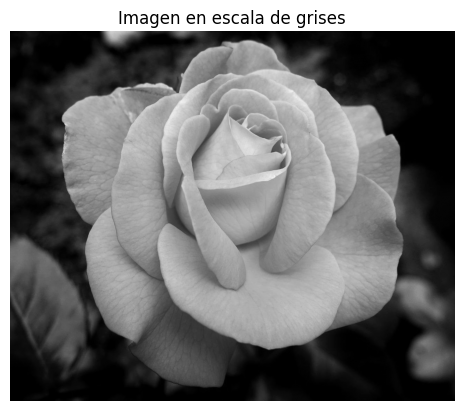

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("flor.jpeg")
image_BW = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_BW, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis('off')

plt.show()

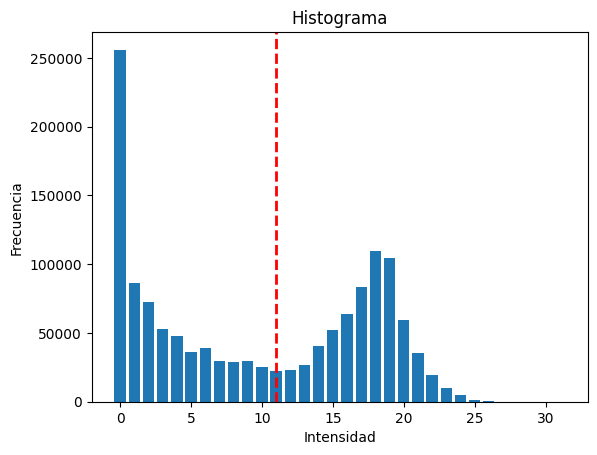

In [3]:
# Histogram
bins = 32
hist = cv2.calcHist([image_BW], [0], None, [bins], [0, 255])
plt.bar(np.arange(bins), hist[:, 0])
plt.title("Histograma")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

umbral = 11  # Índice del bin donde quieres la línea
plt.axvline(x=umbral, color='red', linestyle='--', linewidth=2, label=f'Umbral = {umbral}')

plt.show()

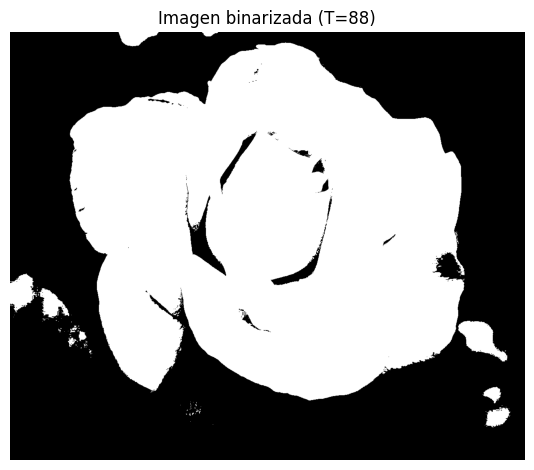

In [4]:
# --- Binarización ---
# Umbral manual: píxeles >= T -> blancos (255), el resto negros (0)

T = 88  # Ajusta este valor según necesites
_, image_bin = cv2.threshold(image_BW, T, 255, cv2.THRESH_BINARY)

plt.imshow(image_bin, cmap='gray')
plt.title(f"Imagen binarizada (T={T})")
plt.axis('off')

plt.tight_layout()
plt.show()

## **Zonas de movimiento**

Podemos detectar en qué zonas de la imagen hay cambios mediante la substracción de imágenes (imagen actual - imagen de fondo).

|<img src="imgs/frame1.jpg">|<img src="imgs/frame2.jpg">|
|--|--|




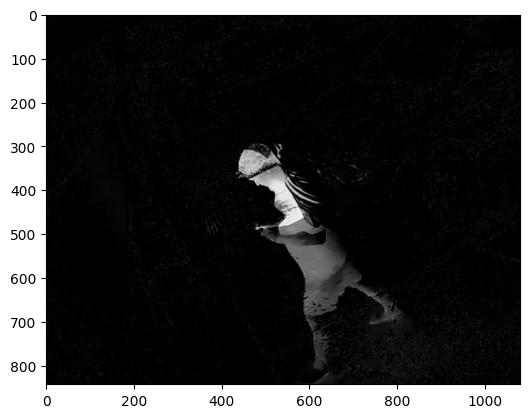

In [5]:
import cv2
import numpy as np
   
# path to input images are specified and 
# images are loaded with imread command
# Load grayscale images
image1 = cv2.imread('imgs/frame1.jpg', 0)
image2 = cv2.imread('imgs/frame2.jpg', 0)
 
sub = cv2.subtract(image1, image2)
 
# plt.imshow(image1, cmap='gray')
plt.imshow(sub, cmap='gray')

<BarContainer object of 32 artists>

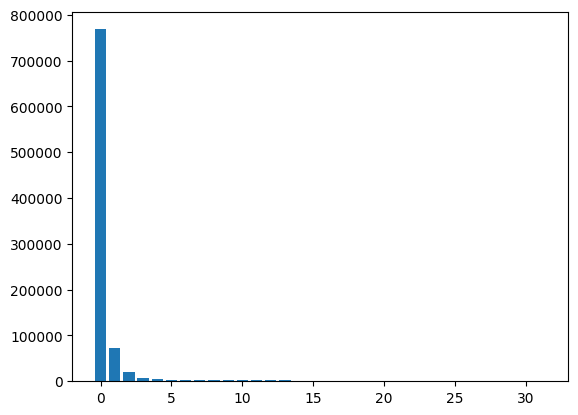

In [6]:
bins = 32
hist = cv2.calcHist([sub], [0], None, [bins], [0, 255])
plt.bar(np.arange(bins), hist[:, 0])

## **Umbralizado**

El umbralizado de imágenes es una técnica que se utiliza para separar objetos dentro de una imagen en función de la intensidad de los píxeles. En términos simples, se trata de convertir una imagen en escala de grises a una imagen binaria, donde los píxeles pueden tener uno de dos valores posibles, generalmente 0 o 255 (blanco o negro).

### **¿Cómo Funciona?**

1. **Selección de un Umbral**: El primer paso en el umbralizado es seleccionar un valor de umbral. Este umbral determinará cómo se clasifican los píxeles.

2. **Aplicación del Umbral**: Después de seleccionar un valor de umbral, se aplica a cada píxel de la imagen de la siguiente manera:
   - Si la intensidad del píxel es menor (o menor o igual, dependiendo de la implementación) que el valor de umbral, el píxel se establece en negro (intensidad 0).
   - Si la intensidad del píxel es mayor que el valor de umbral, el píxel se establece en blanco (intensidad 255).

### **Aplicaciones**

El umbralizado se utiliza en una variedad de aplicaciones, como:
- Separación de objetos del fondo.
- Preprocesamiento antes de la segmentación de imágenes.
- Reducción de la complejidad visual para aumentar el rendimiento de los algoritmos de visión por computador.
- Extracción de características relevantes de una imagen.

En OpenCV, puedes utilizar la función `cv2.threshold` para aplicar umbralizado a una imagen.

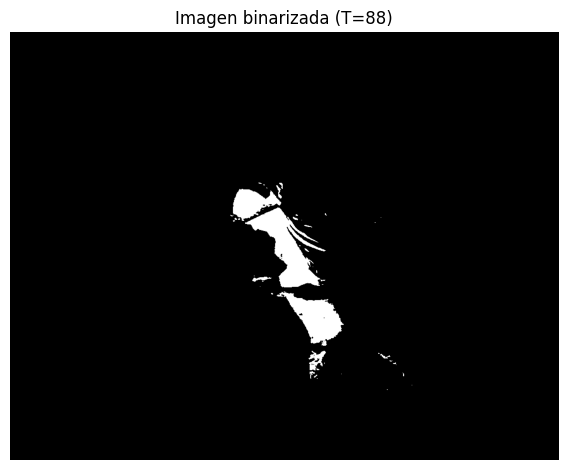

In [7]:
# --- Binarización ---
# Umbral manual: píxeles >= T -> blancos (255), el resto negros (0)

T = 88  # Ajusta este valor según necesites
_, image_bin = cv2.threshold(sub, T, 255, cv2.THRESH_BINARY)

plt.imshow(image_bin, cmap='gray')
plt.title(f"Imagen binarizada (T={T})")
plt.axis('off')

plt.tight_layout()
plt.show()


## **Detección de blobs**

La detección de blobs (Blob Detection) es una técnica clásica en visión por computador que permite identificar y analizar regiones en una imagen que son coherentes en cuanto a ciertas características como intensidad, color, textura o forma.

El término blob proviene de Binary Large Object, pero en visión por computador se refiere a una región compacta de píxeles conectados que se percibe como una sola entidad u objeto.

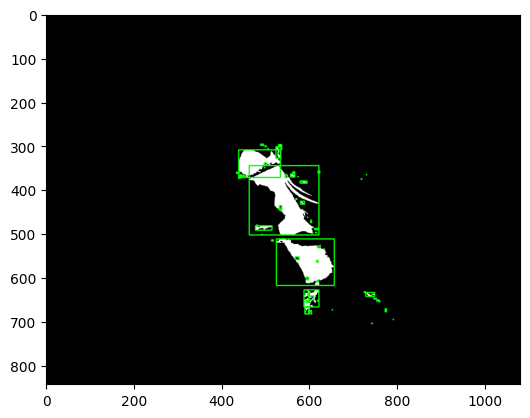

In [8]:
# find the contours
contours, _ = cv2.findContours(image_bin, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(image_bin, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(cnt)
    # draw a green rectangle to visualize the bounding rect
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img, cmap='gray')

### **Filtrado por tamaño del blob**

En este paso vamos a filtrar los blobs en función de su tamaño, con el objetivo de quedarnos únicamente con las regiones u objetos relevantes en la imagen. Los blobs más pequeños suelen corresponder a ruido, imperfecciones o detalles irrelevantes, por lo que serán descartados durante el proceso.

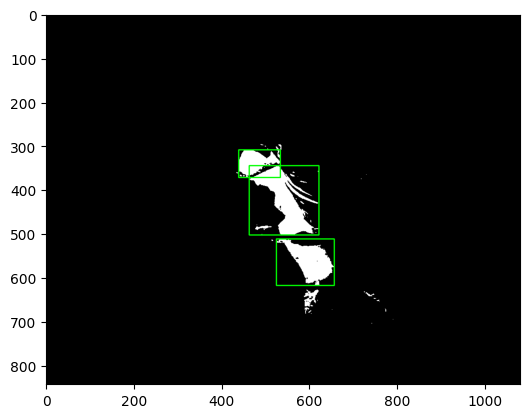

In [9]:
img = cv2.cvtColor(image_bin, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(cnt)
    # draw a green rectangle to visualize the bounding rect
    if cv2.contourArea(cnt) > 1500:  # Filter by size
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img, cmap='gray')

-----

### **Ejercicios**

1. Lee y visualiza el vídeo `carretera.mp4`.
2. Promedia las imágenes del vídeo para obtener un fondo sin coches.
3. Resta el fondo a cada imagen del vídeo.
4. Umbraliza la imagen resultante para quedarte únicamente con las zonas donde hay diferencias significativas en el valor de los píxeles.
4. Detecta los blobs que correspondan a coches, ten en cuenta que los coches son más grandes que el ruido.

In [10]:
# LECTURA DEL VIDEO
import cv2
import numpy as np
import matplotlib.pyplot as plt

video = cv2.VideoCapture("trafico.mp4")
video_BW = cv2.cvtColor(video, cv2.COLOR_BGR2GRAY)

plt.imshow(video_BW, cmap='gray')
plt.title("Video en escala de grises")
plt.axis('off')

plt.show()

error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [3]:
# CREACIÓN DEL FONDO ESTÁTICO
import cv2
import numpy as np
import matplotlib.pyplot as plt

video = cv2.VideoCapture("trafico.mp4")
# Variables para acumular frames
accumulated_frame = None
frame_count = 0

while True:
    ret, frame = video.read()
    if not ret:
        break  # Fin del video

    cv2.imshow('Video', frame)  # Muestra el frame en una ventana

    # Espera 25 ms y sale si se presiona la tecla 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

    # Convierte el frame a float32 para acumulación
    frame_float = frame.astype(np.float32)

    if accumulated_frame is None:
        accumulated_frame = frame_float
    else:
        accumulated_frame += frame_float
    frame_count += 1

video.release()

# Calcula el promedio
background = accumulated_frame / frame_count

# Convierte de nuevo a uint8 para mostrar/guardar
background_uint8 = cv2.convertScaleAbs(background)

# Muestra el fondo promedio
cv2.imshow('Fondo Promedio', background_uint8)
cv2.imwrite('fondo_estatico.jpg', background_uint8)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# UMBRALIZACIÓN Y BINARIZACIÓN DEL VIDEO
import cv2
import numpy as np
import matplotlib.pyplot as plt

fondo = cv2.imread("fondo_estatico.jpg") #Leer la imagen del fondo.
fondo_BW = cv2.cvtColor(fondo, cv2.COLOR_BGR2GRAY) #Pasar el fondo a blanco y negro.

video = cv2.VideoCapture("trafico.mp4")
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convertir el frame a escala de grises
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Restar el fondo al frame actual (diferencia absoluta)
    diff = cv2.absdiff(frame_gray, fondo_BW)

    # Aplicar un umbral para detectar movimiento (valores mayores a 30, por ejemplo)
    T = 30
    _, thresh = cv2.threshold(diff, T, 255, cv2.THRESH_BINARY)
    #cv2.imshow('Diferencia Absoluta', diff)
    #cv2.imshow('Movimiento Detectado', thresh)

# DETECCIÓN DE BLOBS EN EL VIDEO    

    # Limpiar ruido con operaciones morfológicas
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_DILATE, kernel)
    contours, _ = cv2.findContours(cleaned, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 300:
            continue  # Ignoramos áreas pequeñas

        x, y, w, h = cv2.boundingRect(cnt)

        # Adaptar área mínima en función de la posición vertical (y)
        y_center = y + h // 2
        vertical_factor = y_center / frame_height
        min_area = 300 + (1 - vertical_factor) * 1500  # dinámico: 300 a 1800

        if area > min_area:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

#cv2.imshow('Frame con Blobs', frame)
#cv2.imshow('Máscara de Movimiento', cleaned)
# RESULTADO
    cv2.imshow('Deteccion de Coches', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()